In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

In [4]:
data = pd.read_csv('covid_merged_data_clean.csv')

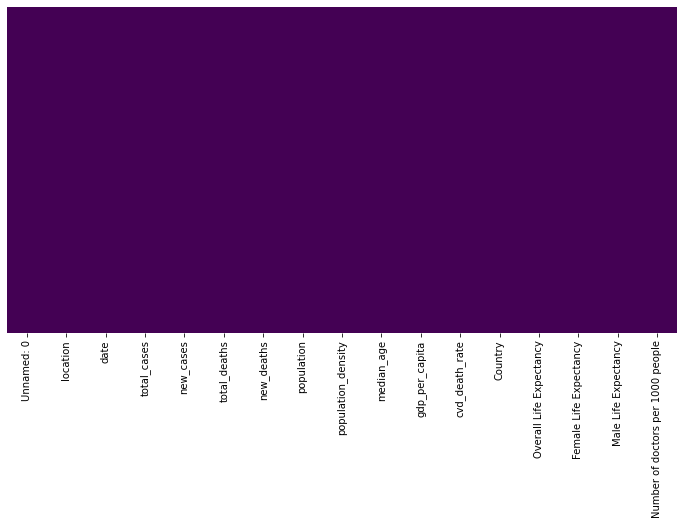

In [6]:
#We're looking for missing data, and as we can see, the data is complete
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [63]:
data.drop(['Female Life Expectancy', 'Male Life Expectancy'], axis=1, inplace=True)

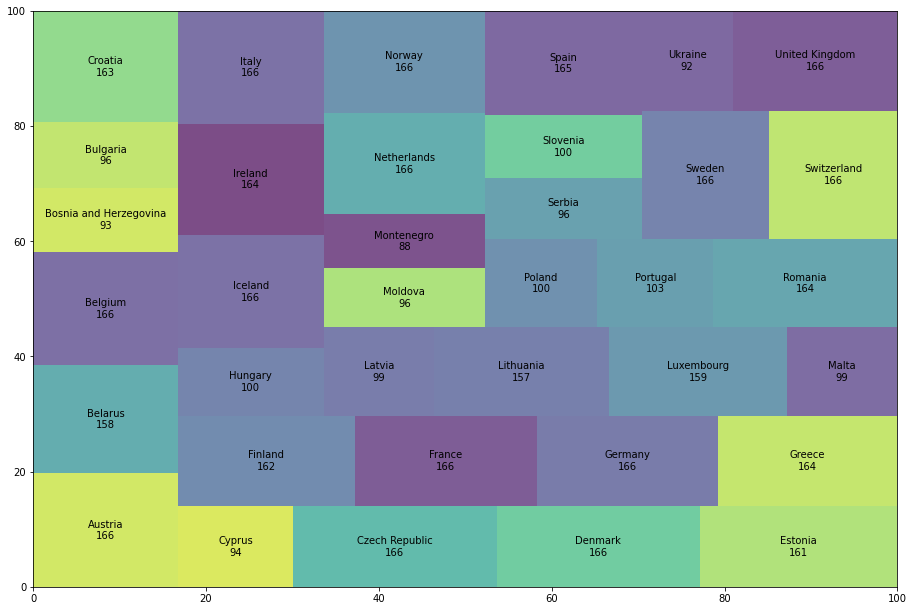

In [65]:
#How many times the data about covid was collected from March do June? 
occurence_count = data.groupby('location')['total_cases'].count()

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
labels = ["%s\n%d" % (label) for label in zip(occurence_count.index, occurence_count.values)]

squarify.plot(sizes=occurence_count.values, label=labels,
               alpha=0.7)

plt.show()

In [66]:
#We will look at current state of countries
newest_data = data.sort_index().drop_duplicates('location', keep='last')

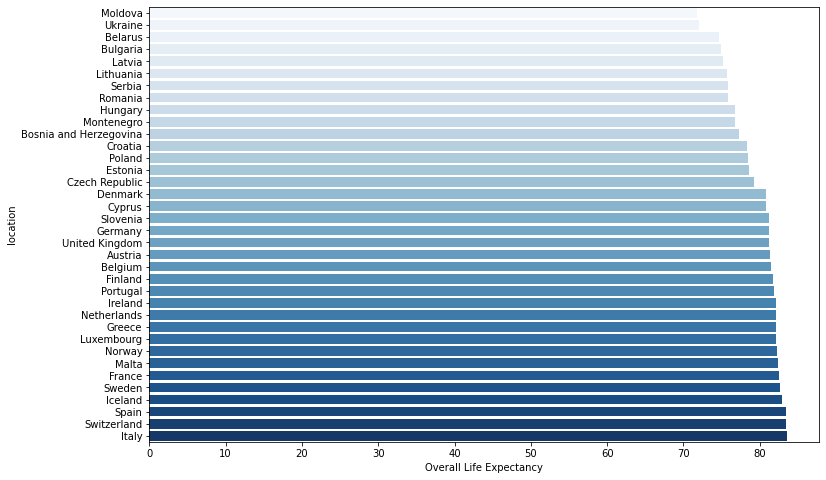

In [34]:
from numpy import median
from matplotlib import pyplot

#Overall Life Expectancy of particular countries
order = newest_data.sort_values(by=['Overall Life Expectancy'])['location']
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="Overall Life Expectancy", y="location", data=newest_data, order=order,palette="Blues")

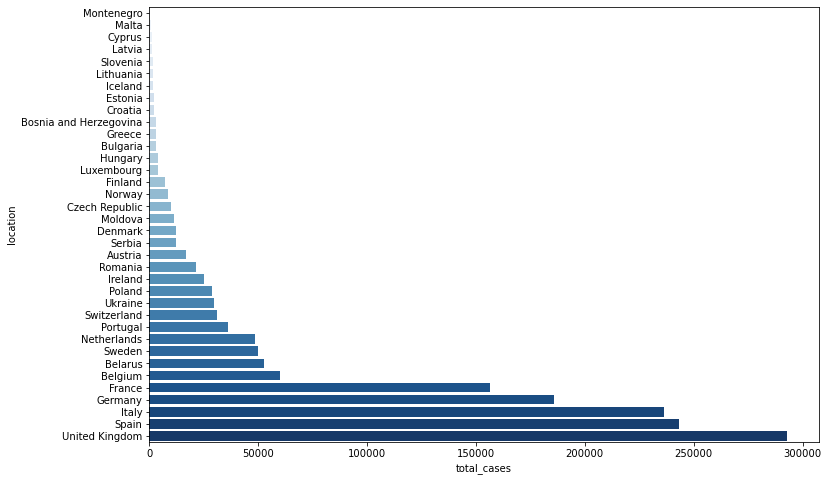

In [35]:
#Total cases by country in Europe
order = newest_data.sort_values(by=['total_cases'])['location']
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="total_cases", y="location", data=newest_data, order=order,palette="Blues")

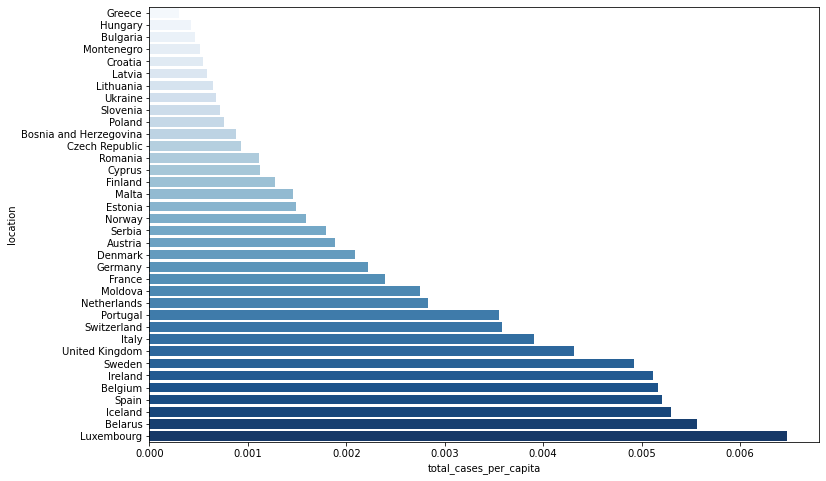

In [38]:
#Total cases per capita in Europe
newest_data['total_cases_per_capita'] = newest_data['total_cases']/newest_data['population']
order = newest_data.sort_values(by=['total_cases_per_capita'])['location']
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="total_cases_per_capita", y="location", data=newest_data, order=order,palette="Blues")

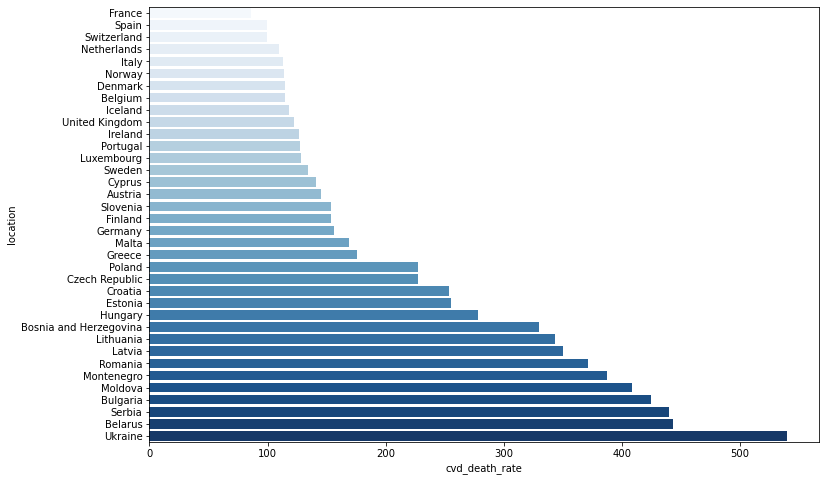

In [68]:
#Death rate of particular countries
order = newest_data.sort_values(by=['cvd_death_rate'])['location']
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="cvd_death_rate", y="location", data=newest_data, order=order,palette="Blues")

In [89]:
newest_data['Doctors per capita'] = newest_data['Number of doctors per 1000 people'].apply(lambda x: float(x.replace(',','.'))/1000)

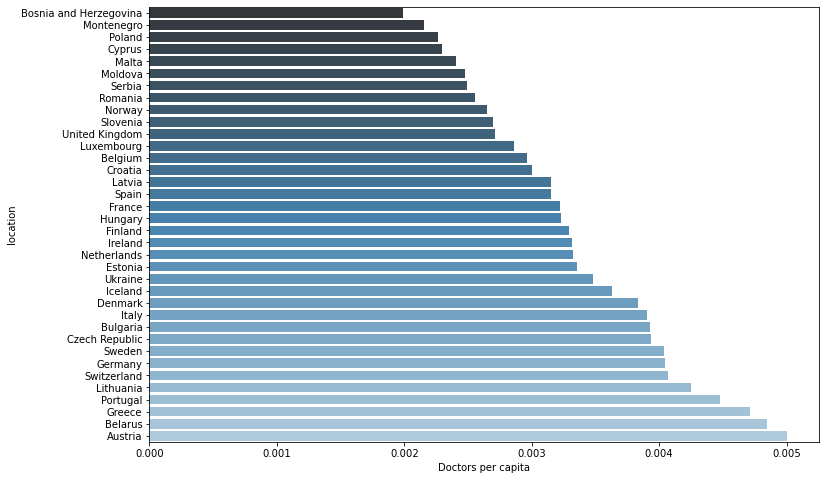

In [92]:
#Checking number of doctors per capita in Europe
order = newest_data.sort_values(by=['Doctors per capita'])['location']
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.barplot(x="Doctors per capita", y="location", data=newest_data, order=order,palette="Blues_d")

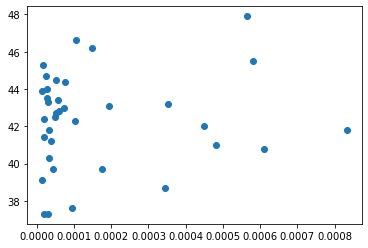

In [60]:
plt.scatter(newest_data['total_deaths']/newest_data['population'], newest_data['median_age'])

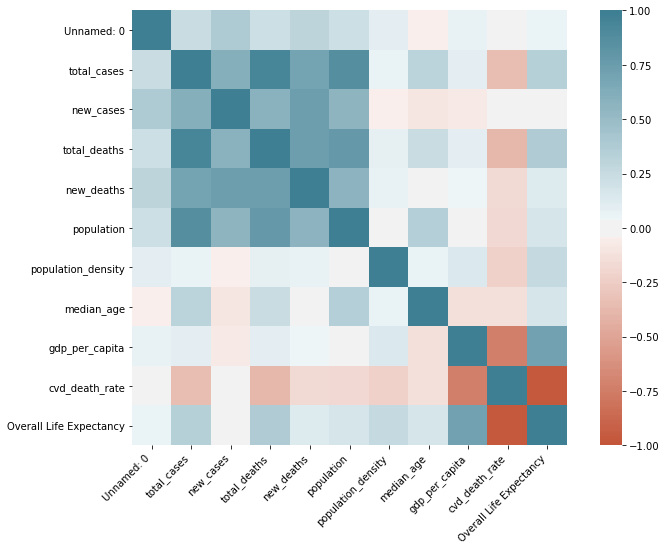

In [86]:
corr = newest_data.corr()
dims = (12, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [83]:
fig = px.scatter(newest_data, x="cvd_death_rate", y='Overall Life Expectancy', hover_data=['location'], size='cvd_death_rate')
fig.show()

In [82]:

import plotly.express as px

fig = px.scatter(newest_data, x="cvd_death_rate", y="gdp_per_capita", hover_data=['location'], size='cvd_death_rate')
fig.show()

In [87]:
fig = px.scatter(newest_data, x="cvd_death_rate", y="population_density", hover_data=['location'], size='cvd_death_rate')
fig.show()

In [91]:
fig = px.scatter(newest_data, x="cvd_death_rate", y="Doctors per capita", hover_data=['location'], size='cvd_death_rate')
fig.show()